## Model - Shipping Cost

In [1]:
# Total: 7564 rows
# Match Invoices: 7463 rows
# Train data : Test data - 0.75 : 0.25

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/weight_model_data.csv')
data.head(1)

,Sales Sku,Sales Order Number,Sales Order Date,Fulfillment Order Number,Fulfillment Channel Name,Quantity,Sku,Total Sales,Total Cost,Commission,Inventory Cost,Estimated Shipping Cost,Shipping Cost,Flag,Profit,Weight,Unnamed: 16,Unnamed: 17
0,A1,11266930721184234,12/1/20,20025454,L,2,A1,12.39,12.5,0.99,6.9,4.61,4.75,1,-0.11,0.34,NaN,NaN


In [3]:
# Create a new variable for test
data['Unit_price'] = data['Total Sales'] / data['Quantity']
data['Unit_price']

0        6.195000
1        3.600000
2        4.480833
3        3.696667
4       17.270000
          ...    
7457    11.720000
7458     5.780000
7459    10.075000
7460     5.832500
7461    12.475000
Name: Unit_price, Length: 7462, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales Sku                 7462 non-null   object 
 1   Sales Order Number        7462 non-null   int64  
 2   Sales Order Date          7462 non-null   object 
 3   Fulfillment Order Number  7462 non-null   int64  
 4   Fulfillment Channel Name  7462 non-null   object 
 5   Quantity                  7462 non-null   int64  
 6   Sku                       7462 non-null   object 
 7   Total Sales               7462 non-null   float64
 8   Total Cost                7462 non-null   float64
 9   Commission                7462 non-null   float64
 10  Inventory Cost            7462 non-null   float64
 11  Estimated Shipping Cost   7462 non-null   float64
 12  Shipping Cost             7462 non-null   float64
 13  Flag                      7462 non-null   int64  
 14  Profit  

In [5]:
data.describe()

,Sales Order Number,Fulfillment Order Number,Quantity,Total Sales,Total Cost,Commission,Inventory Cost,Estimated Shipping Cost,Shipping Cost,Flag,Profit,Weight,Unnamed: 16,Unnamed: 17,Unit_price
count,7.462000e+03,7.462000e+03,7462.000000,7462.000000,7462.000000,7462.000000,7462.000000,7462.000000,7462.000000,7462.0,7462.000000,7462.000000,0.0,0.0,7462.000000
mean,1.130230e+16,2.003024e+07,6.532029,35.280478,35.239589,5.188621,20.088445,9.962522,8.086764,1.0,0.040890,5.303246,NaN,NaN,10.837697
std,1.149682e+14,3.083014e+03,8.057126,29.388110,28.883846,4.368851,19.664322,8.225650,6.347041,0.0,6.066306,10.668691,NaN,NaN,9.325085
min,1.110002e+16,2.002475e+07,1.000000,7.070000,3.870000,0.570000,1.500000,0.000000,0.833000,1.0,-203.240000,0.000000,NaN,NaN,0.212000
25%,1.120396e+16,2.002754e+07,1.000000,20.465000,20.210000,3.030000,9.890000,7.120000,5.750000,1.0,-1.950000,0.780000,NaN,NaN,3.996667
50%,1.130431e+16,2.003023e+07,5.000000,29.980000,30.330000,4.480000,16.170000,8.890000,6.990000,1.0,-0.350000,1.680000,NaN,NaN,7.865833
75%,1.140163e+16,2.003288e+07,12.000000,43.150000,43.057500,6.410000,25.130000,11.230000,9.500000,1.0,1.400000,5.880000,NaN,NaN,15.215000
max,1.149996e+16,2.003588e+07,150.000000,916.770000,901.140000,137.520000,687.240000,219.910000,250.000000,1.0,151.070000,317.520000,NaN,NaN,123.460000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 60.0)

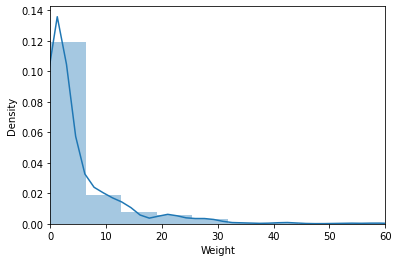

In [6]:
# Check Weight data
sns.distplot(data['Weight'])
plt.xlim(0, 60)

##### Remove Outlier

In [7]:
# Remove outlier
print('Shape of train before outlier ', data.shape)
data = data[np.abs(data['Weight']) - data['Weight'].mean() <= 4 * data['Weight'].std()]
print('Shape of train after outlier ', data.shape)

Shape of train before outlier  (7462, 19)
Shape of train after outlier  (7400, 19)


### Run Random Forest Regressor Model with variable - Weight

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

diff_pred_invoice_list = []
diff_evp_invoice_list = []

for i in range(10):
    # Split train data & test data
    x_train, x_test, y_train, y_test = train_test_split(
            data['Weight'], data['Estimated Shipping Cost'], test_size=0.25, random_state=i)

    # Run DecisionTreeRegressor
    model = RandomForestRegressor(n_estimators=1000, random_state=i)
    
    # Change Series to Numpy
    x_train_np = x_train.to_numpy()
    x_train_np = x_train_np.reshape(-1,1)
    x_test_np = x_test.to_numpy()
    x_test_np = x_test_np.reshape(-1,1)
    y_test_np = y_test.to_numpy()
    y_test_np = y_test_np.reshape(-1,1)

    # Model fitting & predict
    model.fit(x_train_np, y_train)
    prediction = model.predict(x_test_np)
    prediction = prediction.reshape(-1,1)

    # Prediction VS Invoice
    diff = prediction - y_test_np
    diff_pred_invoice = diff.mean()

    # EVP VS Invoice
    test_data = data.loc[y_test.index.values,:]
    diff = test_data['Shipping Cost']- test_data['Estimated Shipping Cost']
    diff_np = diff.to_numpy()
    diff_np = diff_np.reshape(-1,1)
    diff_evp_invoice = diff_np.mean()
    
    diff_pred_invoice_list.append(diff_pred_invoice)
    diff_evp_invoice_list.append(diff_evp_invoice)

### Model Result - Random Forest Regressor Model with variable - Weight

In [9]:
# Variables: Weight
print('10 Means of difference cost model & Invoice data: \n')
for rank, value in enumerate(diff_pred_invoice_list):
    rank += 1
    print(rank, 'Difference: ',round(value,4))
abs_list_unfi_model = np.abs(diff_pred_invoice_list)
print('\nTotal Means of Deviation(absolute value): ', round(sum(abs_list_unfi_model)/ len(abs_list_unfi_model), 3))

print('\n10 Means of difference between original cost model & Invoice data: \n')
for rank, value in enumerate(diff_evp_invoice_list):
    rank += 1
    print(rank, 'Difference: ',round(value,4))
abs_list_evp_model = np.abs(diff_evp_invoice_list)
print('\nTotal Means of Deviation(absolute value): ', round(sum(abs_list_evp_model)/ len(abs_list_evp_model), 3))

10 Means of difference between UNFI cost model & Invoice data: 

1 Difference:  -0.1186
2 Difference:  0.1156
3 Difference:  0.0874
4 Difference:  -0.0759
5 Difference:  -0.0914
6 Difference:  0.1535
7 Difference:  0.0717
8 Difference:  0.0664
9 Difference:  -0.0836
10 Difference:  0.0969

Total Means of Deviation(absolute value):  0.096

10 Means of difference between EVP cost model & Invoice data: 

1 Difference:  -1.8325
2 Difference:  -1.7199
3 Difference:  -1.6703
4 Difference:  -1.8503
5 Difference:  -1.8042
6 Difference:  -1.6218
7 Difference:  -1.7123
8 Difference:  -1.5781
9 Difference:  -1.7825
10 Difference:  -1.6388

Total Means of Deviation(absolute value):  1.721


### Run Random Forest Regressor Model with variables - Weight, Unit price

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

diff_pred_invoice_list = []
diff_evp_invoice_list = []

for i in range(10):
    # Split train data & test data
    x_train, x_test, y_train, y_test = train_test_split(
            data[['Weight','Unit_price']], data['Estimated Shipping Cost'], test_size=0.25, random_state=i)

    # Run DecisionTreeRegressor
    model = RandomForestRegressor(n_estimators=1000, random_state=i)
    
    # Model fitting & predict
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    # Prediction VS Invoice
    diff = prediction - y_test
    diff_pred_invoice = diff.mean()

    # EVP VS Invoice
    test_data = data.loc[y_test.index.values,:]
    diff = test_data['Shipping Cost']- test_data['Estimated Shipping Cost']
    diff_np = diff.to_numpy()
    diff_evp_invoice = diff_np.mean()
    
    diff_pred_invoice_list.append(diff_pred_invoice)
    diff_evp_invoice_list.append(diff_evp_invoice)

### Model Result - Random Forest Regressor Model with variables - Weight, Unit Price

In [156]:
# Variables: Weight, Unit Price
print('10 Means of difference between cost model & Invoice data: \n')
for rank, value in enumerate(diff_pred_invoice_list):
    rank += 1
    print(rank, 'Difference: ',round(value,4))
abs_list_unfi_model = np.abs(diff_pred_invoice_list)
print('\nTotal Means of Deviation(absolute value): ', round(sum(abs_list_unfi_model)/ len(abs_list_unfi_model), 3))

print('\n10 Means of difference between original cost model & Invoice data: \n')
for rank, value in enumerate(diff_evp_invoice_list):
    rank += 1
    print(rank, 'Difference: ',round(value,4))
abs_list_evp_model = np.abs(diff_evp_invoice_list)
print('\nTotal Means of Deviation(absolute value): ', round(sum(abs_list_evp_model)/ len(abs_list_evp_model), 3))

10 Means of difference between UNFI cost model & Invoice data: 

1 Difference:  -0.0246
2 Difference:  0.1081
3 Difference:  -0.2477
4 Difference:  0.0959
5 Difference:  0.0634
6 Difference:  0.0032
7 Difference:  0.1988
8 Difference:  0.1496
9 Difference:  -0.1063
10 Difference:  -0.0818

Total Means of Deviation(absolute value):  0.108

10 Means of difference between EVP cost model & Invoice data: 

1 Difference:  -1.9878
2 Difference:  -1.7342
3 Difference:  -2.0486
4 Difference:  -1.8388
5 Difference:  -1.7205
6 Difference:  -1.9493
7 Difference:  -1.752
8 Difference:  -1.9104
9 Difference:  -2.0526
10 Difference:  -1.9806

Total Means of Deviation(absolute value):  1.897
